Let's first try if the functionality works


got cost_type EXTERNAL for cost_type_e, hessian_approx: 'GAUSS_NEWTON'.
With this setting, acados will proceed computing the exact Hessian for the cost term and no Hessian contribution from constraints and dynamics.
If the external cost is a linear least squares cost, this coincides with the Gauss-Newton Hessian.
Note: There is also the option to use the external cost module with a numerical Hessian approximation (see `ext_cost_num_hess`).
OR the option to provide a symbolic custom Hessian approximation (see `cost_expr_ext_cost_custom_hess`).

rm -f libacados_ocp_solver_actuators_diff_drive.so
rm -f actuators_diff_drive_constraints/actuators_diff_drive_constr_h_0_fun_jac_uxt_zt.o actuators_diff_drive_constraints/actuators_diff_drive_constr_h_0_fun.o actuators_diff_drive_constraints/actuators_diff_drive_constr_h_fun_jac_uxt_zt.o actuators_diff_drive_constraints/actuators_diff_drive_constr_h_fun.o acados_solver_actuators_diff_drive.o
cc -fPIC -std=c99   -O2 -I/home/lukas/ETH_Zuerich/ASL

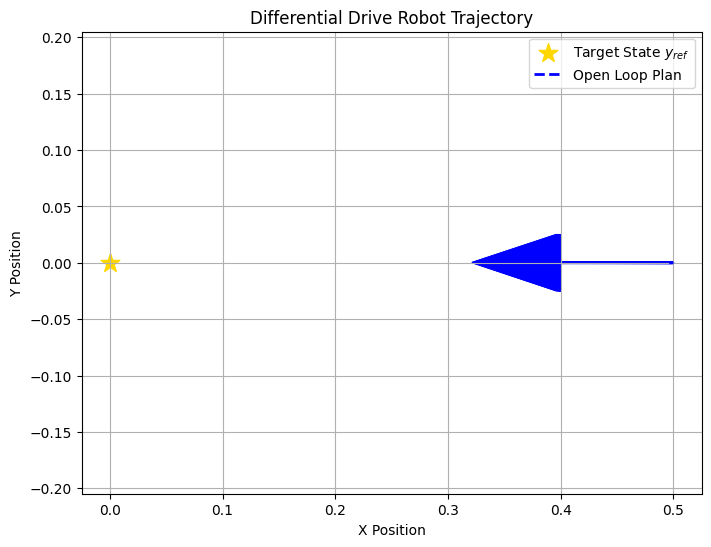

[VanDerPolMPC] OCP solver returned status 2.
[VanDerPolMPC] OCP solver returned status 2.
Closed loop sim runs through succesfully


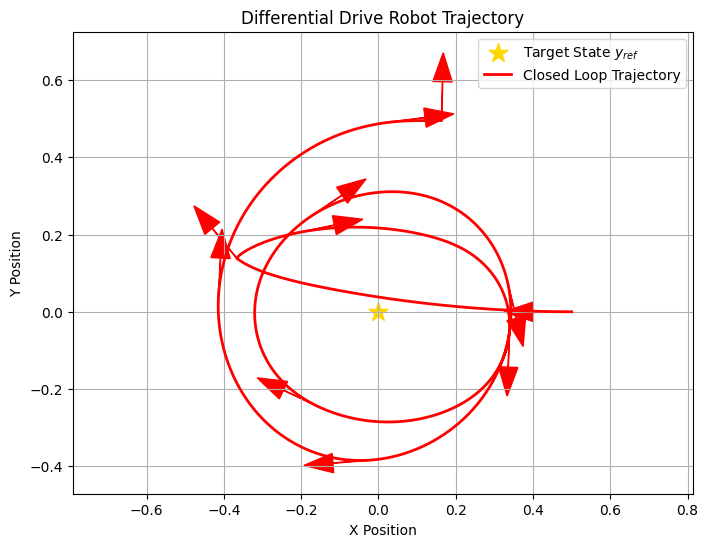

In [4]:

from Differential_drive_MPC import DifferentialDriveMPC, DifferentialDriveMPCOptions
import numpy as np
from utils_diff_drive import simulate_closed_loop
from plotting_utils_diff_drive import plot_diff_drive_trajectory

# Compile MPC

mpc_opts = DifferentialDriveMPCOptions()
mpc_opts.N = 10
mpc_opts.step_sizes = [0.02]*10
mpc_opts.switch_stage = 12
mpc = DifferentialDriveMPC(mpc_opts)

print("Acados compiles sucessfully")

# call solve for given initial state
X0 = np.array([0.5, 0.0, 0.0, np.pi, 0.0, 0.0, 0.0])  # Intital state
mpc.solve(X0)
print("Solve runs through succesfully")

# Visualize open loop plan
traj_x, traj_u = mpc.get_planned_trajectory()
plot_diff_drive_trajectory(np.zeros(2), open_loop_plan=np.array(traj_x))

# Try simulation in closed loop
duration = 50
x_traj, u_traj, stage_costs = simulate_closed_loop(X0, mpc, duration)
print("Closed loop sim runs through succesfully")

plot_diff_drive_trajectory(np.zeros(2), closed_loop_traj=x_traj)
